# Homework 2: Linear Regression

The is the coding potion of Homework 2. The homework is aimed at testing the ability to deal with a real-world dataset and use linear regression on it.

In [1]:
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset
Loading the California Housing dataset using sklearn.

In [2]:
# Load dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Part 1 : Analyse the dataset

In [3]:
# Put the dataset along with the target variable in a pandas dataframe
data = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add target to data
data['target'] = housing['target']
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 1a : Check for missing values in the dataset

The dataset might have missing values represented by a `NaN`. Check if the dataset has such missing values.

In [4]:
# Check for missing values
from cmath import nan
import math

def is_null(dataframe):
    """
    This function takes as input a pandas dataframe and outputs whether the
    dataframe has missing values. Missing values can be detected by checking
    for the presence of None or NaN. inf or -inf must also be treated as a missing value.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return True is there are missing value in the dataframe. If not, return False.
    """
    # YOUR CODE HERE
    """
    df = dataframe
    row, col = df.shape[0], df.shape[1]
    for i in range(row):
        for j in range(col):
            val = df.iloc[i][j]
            if val == None or val == nan or val == math.inf or val == -math.inf:
                return True
    return False
    /* above approach take more time */
    """
    a = dataframe.to_numpy()
    row, col = a.shape[0], a.shape[1]
    for i in range(row):
        for j in range(col):
            val = a[i][j]
            if val == None or val == nan or val == math.inf or val == -math.inf:
                return True
    return False

In [5]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# This dataset has no null values; you can run this cell as a sanity check.
print(f"The data has{'' if is_null(data) else ' no'} missing values.")
assert not is_null(data)

The data has no missing values.


### Part 1b: Studying the distribution of the target variable

Plot the histogram of the target variable over a fixed number of bins (say, 30).

Example histogram output:

![Target histogram](https://jeffcui.com/misc/target_histogram.png)

Hint: Use the histogram plotting function available in Seaborn in Matplotlib.

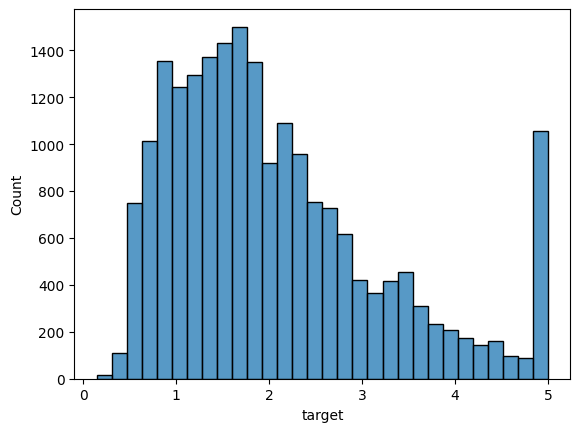

In [6]:
# Plot histogram of target variable

# YOUR CODE HERE
sns.histplot(data = data, x = 'target', bins = 30)
plt.show()

### Part 1c: Plotting the correlation matrix
Given the dataset stored in the `data` variable, plot the correlation matrix for the dataset. The dataset has 9 variables (8 features and one target variable) and thus, the correlation matrix must have a size of `9x9`.

Hint: You may use the correlation matrix computation of a dataset provided by the `pandas` library.

Link: [What is a correlation matrix?](https://www.displayr.com/what-is-a-correlation-matrix/)

<AxesSubplot: >

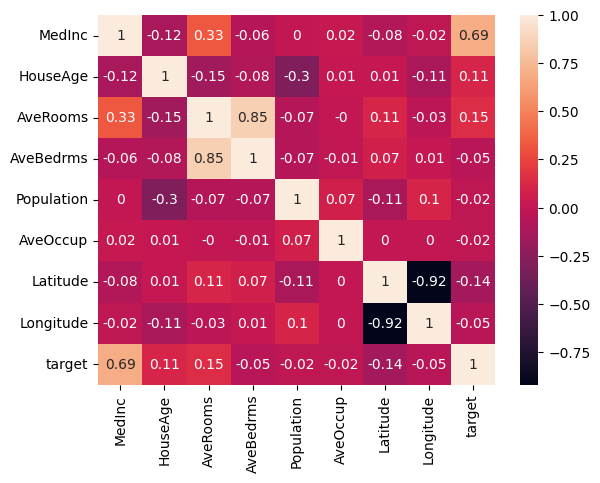

In [7]:
# Correlation matrix
def get_correlation_matrix(dataframe):
    """
    Given a pandas dataframe, obtain the correlation matrix
    computing the correlation between the entities in the dataset.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return the correlation matrix as a pandas dataframe, rounded off to 2 decimal places.
    """
    # YOUR CODE HERE
    return dataframe.corr().round(2)

# Plot the correlation matrix
correlation_matrix = get_correlation_matrix(data)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# You can check your output against the expected correlation matrix below:
ground_truth = np.array([
    [1.0, -0.12, 0.33, -0.06, 0.0, 0.02, -0.08, -0.02, 0.69],
    [-0.12, 1.0, -0.15, -0.08, -0.3, 0.01, 0.01, -0.11, 0.11],
    [0.33, -0.15, 1.0, 0.85, -0.07, 0.0, 0.11, -0.03, 0.15],
    [-0.06, -0.08, 0.85, 1.0, -0.07, -0.01, 0.07, 0.01, -0.05],
    [0.0, -0.3, -0.07, -0.07, 1.0, 0.07, -0.11, 0.1, -0.02],
    [0.02, 0.01, 0.0, -0.01, 0.07, 1.0, 0.0, 0.0, -0.02],
    [-0.08, 0.01, 0.11, 0.07, -0.11, 0.0, 1.0, -0.92, -0.14],
    [-0.02, -0.11, -0.03, 0.01, 0.1, 0.0, -0.92, 1.0, -0.05],
    [0.69, 0.11, 0.15, -0.05, -0.02, -0.02, -0.14, -0.05, 1.0],
])
assert np.allclose(ground_truth, get_correlation_matrix(data).to_numpy(), rtol=1e-2, atol=1e-2)

### Part 1d: Extracting relevant variables

Based on the correlation matrix obtained in the previous part, identify the top-4 most relevant features from the dataset for predicting the target variable.

- MedInc 0.69
- AveRooms 0.15
- Latitude -0.14
- HouseAge 0.11

## Part 2: Data Manipulation

This section is focused on arranging the dataset in a format suitable for training the linear regression model.

### Part 2a: Normalize the dataset

Find the mean and standard deviation corresponding to each feature and target variable in the dataset. Use the values of the mean and standard deviation to normalize the dataset.

In [9]:
features = np.concatenate([data[name].to_numpy()[:, None] for name in housing['feature_names']], axis=1)
target = housing['target']

# Normalize data
def normalize(features, target):
    # YOUR CODE HERE
    f = features
    f_row, f_col = f.shape[0], f.shape[1]
    f_mean = f.mean(axis = 0)
    f_std = f.std(axis = 0)
    for j in range(f_col):
        for i in range(f_row):
            f[i][j] -= f_mean[j]
            f[i][j] /= f_std[j]
    t = target
    t_mean = t.mean(axis = 0)
    t_std = t.std(axis = 0)
    t_n = t.shape[0]
    for i in range(t_n):
        t[i] -= t_mean
        t[i] /= t_std
    return f, t

features_normalized, target_normalized = normalize(features, target)

In [10]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.
assert all(np.abs(features_normalized.mean(axis=0)) < 1e-2), "Mean should be close to 0"
assert all(np.abs(features_normalized.std(axis=0) - 1) < 1e-2), "Standard deviation should be close to 1"
assert np.abs(target_normalized.mean(axis=0)) < 1e-2, "Mean should be close to 0"
assert np.abs(target_normalized.std(axis=0) - 1) < 1e-2, "Standard deviation should be close to 1"

### Part 2b: Train-Test Split

Use the train-test split function from `sklearn` and execute a 80-20 train-test split of the dataset.

In [11]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size = 0.8, test_size = 0.2)

In [12]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# Sanity checking:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Part 3: Linear Regression

In this part, a linear regression model is used to fit the dataset loaded and normalized above.

### Part 3a: Code for Linear Regression
Implement a closed-form solution for ordinary least squares linear regression in `MyLinearRegression`, and print out the RMSE and $R^2$ between the ground truth and the model prediction.

In [13]:
class MyLinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, Y):
        # Given X and Y, compute theta using the closed-form solution for linear regression.
        # YOUR CODE HERE
        x, y = X.copy(), Y.copy()
        n = x.shape[0]
        for i in range(n):
            np.insert(x, 0, 1)
        y = y.reshape(n, 1)
        theta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
        self.theta = theta
        return theta
    
    def predict(self, X):
        # Predict Y for a given X
        # YOUR CODE HERE
        x = X.copy()
        n = x.shape[0]
        for i in range(n):
            np.insert(x, 0, 1)
        return np.dot(x, self.theta)

In [14]:
# Train the model on (X_train, Y_train) using Linear Regression 
my_model = MyLinearRegression()
my_model.fit(X_train, Y_train)

array([[ 0.7117815 ],
       [ 0.1004027 ],
       [-0.22318309],
       [ 0.25076373],
       [-0.00633857],
       [-0.03521465],
       [-0.78670989],
       [-0.75885015]])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute train RMSE using (X_train, Y_train)
y_train_predict = my_model.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
train_r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(train_rmse))
print('R2 score is {}'.format(train_r2))
print("\n")

# Compute test RMSE using (X_test, Y_test)
y_test_predict = my_model.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
test_r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(test_rmse))
print('R2 score is {}'.format(test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.6325044657028708
R2 score is 0.6025201701530978


The model performance for testing set
--------------------------------------
RMSE is 0.6075172000467761
R2 score is 0.6210767139577711


### Part 3b: Compare with LinearRegression from sklearn.linear_model

Use LinearRegression from the `sklearn` package to fit the dataset and compare the results obtained with your own implementaion of Linear Regression.

The linear regressor should be named `model` for the cells below to run properly.

In [16]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)

In [17]:
# model evaluation for training set
y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.6325040644245501
R2 score is 0.6025206744973252


The model performance for testing set
--------------------------------------
RMSE is 0.6075208338489084
R2 score is 0.6210721809622849


### Part 3c: Analysis Linear Regression Performance

In this section, provide the observed difference in performance along with an explanation of the following:
- Difference between training between unnormalized and normalized data.
- Difference between training on all features versus training on the top-5 most relevant features in the dataset.
- Difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features.

Write your answer below.

1. difference between training between unnormalized and normalized data
* unnormalized
    * MyLinearRegression
        ```
        The model performance for training set
        --------------------------------------
        RMSE is 0.6274399780727136
        R2 score is 0.6013605474516523


        The model performance for testing set
        --------------------------------------
        RMSE is 0.6279718583023217
        R2 score is 0.6240449680621314
        ```
    * LinearRegression from sklearn
        ``` 
        The model performance for training set
        --------------------------------------
        RMSE is 0.6274385393991952
        R2 score is 0.6013623755511879


        The model performance for testing set
        --------------------------------------
        RMSE is 0.6279848916905705
        R2 score is 0.6240293622075719
        ```
* normalized
    * MyLinearRegression
        ```
        The model performance for training set
        --------------------------------------
        RMSE is 0.6237806987205472
        R2 score is 0.6076515191842307


        The model performance for testing set
        --------------------------------------
        RMSE is 0.6423536906994114
        R2 score is 0.6003918327239364
        ```
    * LinearRegression from sklearn
        ```
        The model performance for training set
        --------------------------------------
        RMSE is 0.6237719044889968
        R2 score is 0.6076625819794517


        The model performance for testing set
        --------------------------------------
        RMSE is 0.6424306441226655
        R2 score is 0.6002960815548773
        ```
* observation: 
    * training set:  
        * unnormalized data: RMSE $\approx$ 0.62744, normalized data: RMSE $\approx$ 0.62378, normalized data's RMSE seem to be lower,
        difference $\approx$ 0.62744 - 0.62378 = 0.00366
        * unnormalized data: R2 score $\approx$ 0.60136, normalized data: R2 score $\approx$ 0.60765, unnormalized data's R2 score seem to be lower,
        difference $\approx$ 0.60765 - 0.60136 = 0.00629
    * testing set:
        * unnormalized data: RMSE $\approx$ 0.62797, normalized data: RMSE $\approx$ 0.64235, unnormalized data's RMSE seem to be lower,
        difference $\approx$ 0.64235 - 0.62797 = 0.01438
        * unnormalized data: R2 score $\approx$ 0.62404, normalized data: R2 score $\approx$ 0.60039, normalized data's R2 score seem to be lower,
        difference $\approx$ 0.62404 - 0.60039 = 0.02365
* using X_train, X_test, Y_train, Y_test = train_test_split(features_normalized, target_normalized, train_size = 0.8, test_size = 0.2)


2. difference between training on all features versus training on the top-5 most relevant features in the dataset
* 'MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms' are top-5 features
* training on all features
    ```
    The model performance for training set
    --------------------------------------
    RMSE is 0.6274385393991952
    R2 score is 0.6013623755511879


    The model performance for testing set
    --------------------------------------
    RMSE is 0.6279848916905705
    R2 score is 0.6240293622075719
    ```
* training on top-5 features
    ```
    The model performance for training set
    --------------------------------------
    RMSE is 0.6762907486003943
    R2 score is 0.5446199489263248


    The model performance for testing set
    --------------------------------------
    RMSE is 0.6835121965605816
    R2 score is 0.5242661206644932
    ```
* observation
* training set:
    all features: RMSE $\approx$ 0.62744, top-5 features: RMSE $\approx$ 0.67629, top-5 features's RMSE seem to be higher, difference $\approx$ 0.67629 - 0.62744 = 0.04885
    all features: R2 score $\approx$ 0.60136, top-5 features: R2 score $\approx$ 0.54462, all features's R2 score seem to be higher, difference $\approx$ 0.60136 - 0.54462 = 0.05674
* using features = np.concatenate([data[name].to_numpy()[:, None] for name in ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']], axis = 1)


3. difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features

* all features unnormalized
    ```
    The model performance for training set
    --------------------------------------
    RMSE is 0.6274385393991952
    R2 score is 0.6013623755511879


    The model performance for testing set
    --------------------------------------
    RMSE is 0.6279848916905705
    R2 score is 0.6240293622075719
    ```

* top 4 unnormalized
    ``` 
    The model performance for training set
    --------------------------------------
    RMSE is 0.671380395385047
    R2 score is 0.5477404657858351


    The model performance for testing set
    --------------------------------------
    RMSE is 0.7024800506206409
    R2 score is 0.5129312505477825
    ```

* top 4 normalized
    ```
    The model performance for training set
    --------------------------------------
    RMSE is 0.6791210488108694
    R2 score is 0.5350032082212628


    The model performance for testing set
    --------------------------------------
    RMSE is 0.6739473406162616
    R2 score is 0.5600876594338523
    ```
* observation training on top-4: 
    * training set:
        * all features unnormalized data: RMSE $\approx$ 0.62744, top-4 unnormalized data: RMSE $\approx$ 0.67138, top-4 normalized data: RMSE $\approx$ 0.67912, top-4 unnormalized data's RMSE seem to be highest, difference with lowest $\approx$ 0.67912 - 0.62744 = 0.05168
        * all features unnormalized data: R2 score $\approx$ 0.60136, top-4 unnormalized data: R2 score $\approx$ 0.54774, top-4 normalized data: R2 score $\approx$ 0.53500, all features unnormalized data's R2 score seem to be highest, difference with lowest $\approx$ 0.60136 - 0.53500 = 0.06636
    * testing set:
        * all features unnormalized data: RMSE $\approx$ 0.62798, top-4 unnormalized data: RMSE $\approx$ 0.70248, top-4 normalized data: RMSE $\approx$ 0.67395, top-4 unnormalized data's RMSE seem to be highest, difference with lowest $\approx$ 0.70248 - 0.62798 = 0.0745
        * all features unnormalized data: R2 score $\approx$ 0.62403, top-4 unnormalized data: R2 score $\approx$ 0.51293, top-4 normalized data: R2 score $\approx$ 0.56009, all features unnormalized data's R2 score seem to be highest, difference with lowest $\approx$ 0.62403 - 0.51293 = 0.1111